In [1]:
import nltk 
import pandas as pd 
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%pylab inline
from nltk.corpus import stopwords

import pycountry as pc

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading in the csv file
email_path = "./hillary-clinton-emails/Emails.csv"
email_df = pd.read_csv(email_path, encoding="utf-8")

In [3]:
email_df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [4]:
email_df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


# Question 1: Raw Word Cloud
### This section outputs the word cloud without any preprocessing that is specific for text manipulation. We used the messages within the *ExtractedBodyText* and *ExtractedSubject* as our main point of information. We dropped any NaN rows that were not present in the aforementioned columns and appended the information in the two columns together to create the initial corpus

In [5]:
email_df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [6]:
email_df.shape

(7945, 22)

In [7]:
email_df.dropna(subset=['ExtractedBodyText'], inplace=True)

In [8]:
email_df.shape

(6742, 22)

In [9]:
email_df['ExtractedSubject'].isnull().any()
email_df.dropna(subset=['ExtractedSubject'], inplace=True)
email_df.shape

(5425, 22)

In [10]:
text = email_df['ExtractedBodyText']

In [11]:
text = text.append(email_df['ExtractedSubject'])

In [12]:
test_text = " ".join(text) # to add space

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,stopwords=stopwords)

In [13]:
def word_cloud_creator(text):
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")

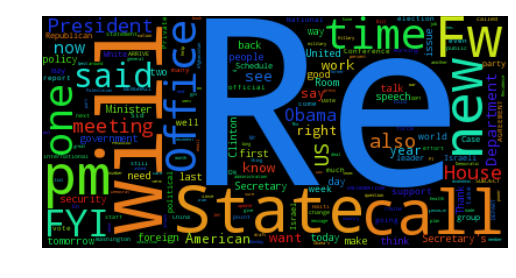

In [14]:
word_cloud_creator(test_text)

##  PREPROCESSING

### TOKENIZATION : We split the sentences into individual word and specified for certain attributes

For example, you can define a tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else. 
The following tokenizer does this for alphanumeric and money expressions (dollars)


In [15]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$')

In [16]:
tokens = tokenizer.tokenize(test_text)

### CASE FOLDING : This changes the characters in each token from upper to lower case

In [17]:
tokens_lower_case = [token.lower() for token in tokens ]

### REMOVE STOPWORDS : these are commons words such as 'the' that are known to not have a huge impact on natural language processing
### We used two separate stop word lists to remove as many stopwords as possible under the presumption that neither list was fully comprehensive 

In [18]:
stop_words = STOPWORDS

In [19]:
len(tokens_lower_case)

444927

In [20]:
filtered_words_tmp = [word for word in tokens_lower_case if word not in stop_words]

In [21]:
len(filtered_words_tmp)

271349

In [22]:
stop_words_2 = stopwords.words('english')

In [23]:
filtered_words_lower_case = [word for word in filtered_words_tmp if word not in stop_words_2]

In [24]:
len(filtered_words_lower_case)

256562

### WE DECIDE ALSO TO REMOVE THE SHORT WORD (length less than 3 characters)

In [25]:
email_join = [word for word in filtered_words_lower_case if len(word)>3 and word not in ['USA']]

211413

In [26]:
len(email_join)

211413

### STEMMING

In [27]:
porter = nltk.PorterStemmer()

token_stem_lower_case = [porter.stem(token) for token in email_join]

## WORLDCLOUD NEW 

#### WITH STEMMING 

In [28]:
new_text = " ".join(token_stem_lower_case)

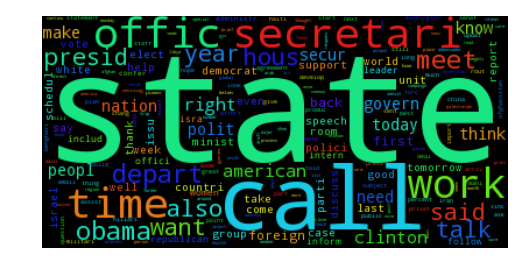

In [29]:
word_cloud_creator(new_text)

####  WITHOUT STEMMING

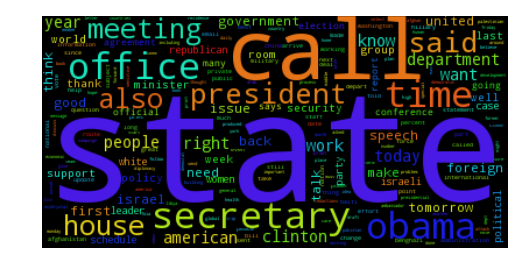

In [30]:
new_text = " ".join(email_join)
word_cloud_creator(new_text)

# QUESTION  2

 1 - check if there is a country and also the abbreviation in bodytext one by one
 2 - If is not there ignore the email
 3 - If it's there add the country in the new column in a list (it may be multiple)
 

In [31]:
from nltk.sentiment.util import *

/home/trinh/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [33]:
email_df['token'] = email_df['ExtractedBodyText'].apply(tokenizer.tokenize)
email_df['token'].head()

2                                                 [Thx]
5     [Pis, print, H, hrod17, clintonernailcom, Wedn...
8                                                 [FYI]
9     [B6, Wednesday, September, 12, 2012, 6, 16, PM...
10                                            [Fyi, B6]
Name: token, dtype: object

In [34]:
email_df['token_subject'] = email_df['ExtractedSubject'].apply(tokenizer.tokenize)
email_df['token_subject'].head()

2                                  [Re, Chris, Stevens]
5     [Meet, The, Right, Wing, Extremist, Behind, An...
8                          [FVV, Secretary, s, remarks]
9                                     [more, on, Libya]
10    [AbZ, and, Hb3, on, Libya, and, West, Bank, Gaza]
Name: token_subject, dtype: object

In [35]:
def return_country_and_sentiment(df_row,country_sentiment):
    vader_analyzer = SentimentIntensityAnalyzer()
    tmp = []
    #fetch row by row the ExtractedBodyText and the Extracted Subject
    token_list_extractedbodytext = df_row['token']
    token_list_extractedsubject = df_row['token_subject']
    raw_text = df_row['ExtractedBodyText']
    # remove the stopwords of the list of token for both field
    extractedbodytext = [word for word in token_list_extractedbodytext if word not in stop_words]
    extractedsubject = [word for word in token_list_extractedsubject if word not in stop_words]
    
    #look in the extractedbodytext
    for token in extractedbodytext:
        if token in ['AM','PM','TO','RE','NO','FM','FW']:
            continue
        try:
            country = pc.countries.get(name = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None    
        try:
            country=pc.countries.get(alpha_2 = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None
            
    
    #look in the extractedSubject
    for token in extractedsubject:
        if token in ['AM','PM','TO','RE','NO','FM','FW']:
            continue
        try:
            country = pc.countries.get(name = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None    
        try:
            country=pc.countries.get(alpha_2 = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None
            
    #compute the sentiment on the ExtractedBodyText (not token form)
    sentiment = (vader_analyzer.polarity_scores(raw_text)['compound']+1)/2
            
    for elem in tmp:
        if elem in country_sentiment.index:
            country_sentiment.loc[elem]['NumberTimes'] = country_sentiment.loc[elem]['NumberTimes']+1
        else:
            country_sentiment.set_value(elem,['NumberTimes','Sentiment'],[1,0])
        
        #add the sentiment for each country mentionned in the email
        
        country_sentiment.loc[elem]['Sentiment'] = country_sentiment.loc[elem]['Sentiment']+sentiment
            
    

    
    

In [36]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$')

In [37]:
country_sentiment = pd.DataFrame(columns=['NumberTimes','Sentiment'])

In [38]:
country_sentiment

,NumberTimes,Sentiment


In [39]:
_=email_df.apply(return_country_and_sentiment,args=(country_sentiment,),axis=1)

In [40]:
# TONGA = TO, SAINT PIERRE AND MIQUELON = PM, NORWAY = NO, ARMENIA = AM, Réunion = RE, Micronesia = FM, Tuvalu = TV

In [41]:
country_sentiment.sort_values(by='NumberTimes',ascending=False).head()

,NumberTimes,Sentiment
United States,170.0,118.35220
Haiti,138.0,87.73705
India,136.0,86.16800
Afghanistan,82.0,54.76525
Pakistan,78.0,49.46915
China,69.0,50.58165
Israel,67.0,45.94940
Libya,63.0,30.08810
Iraq,49.0,31.59325
Honduras,48.0,30.68695


In [42]:
def average_sentiment(dataframe):
    return dataframe['Sentiment']/dataframe['NumberTimes']

In [43]:
country_sentiment['Sentiment'] = country_sentiment.apply(average_sentiment, axis=1)

In [44]:
country_sentiment.sort_values(by="NumberTimes",ascending=False).head()

,NumberTimes,Sentiment
United States,170.0,0.696189
Haiti,138.0,0.635776
India,136.0,0.633588
Afghanistan,82.0,0.667869
Pakistan,78.0,0.634220
China,69.0,0.733067
Israel,67.0,0.685812
Libya,63.0,0.477589
Iraq,49.0,0.644760
Honduras,48.0,0.639311


In [46]:
country=country_sentiment[country_sentiment['NumberTimes']>30]

In [47]:
country.head()

,NumberTimes,Sentiment
Libya,63.0,0.477589
United States,170.0,0.696189
Iraq,49.0,0.644760
Israel,67.0,0.685812
India,136.0,0.633588


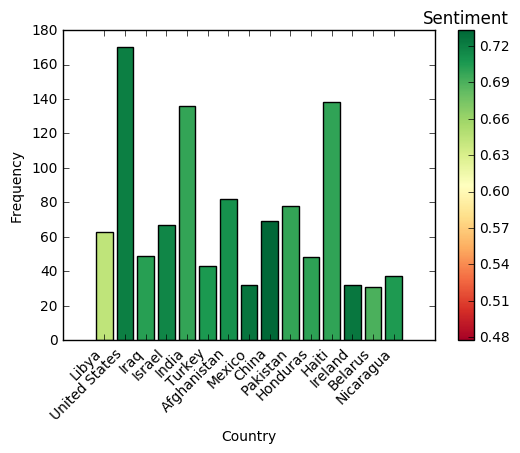

In [48]:
# http://stackoverflow.com/questions/31313606/pyplot-matplotlib-bar-chart-with-fill-color-depending-on-value
from matplotlib import cm
# Set up colors : red to green
y = np.array(country['Sentiment'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(country.shape[0]), country['NumberTimes'], align='center', tick_label=country.index, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

# QUESTION 3
## In this excercise, we used gensim to perform topic modelling. 
1. We placed our corpus in a format accepted to gensim (The gensim dictionary object)
2. We used the bag of words representation for each of the aforementioned words
3. Performed LDA models using numbers to create models with number of topics varying from 5 to 50
4. Each of these models were saved as a lda file
5. The main topics associated with the models were compared

In [36]:
import gensim

In [37]:
my_corpus = email_join
corpus_series = pd.Series(my_corpus)
#define dictionary of the actual words as bag of words model does not keep this information
corpus_dict = gensim.corpora.dictionary.Dictionary([corpus_series])

print(corpus_dict)

Dictionary(21174 unique tokens: [u'raining', u'writings', u'finessed', u'siguroardottir', u'yellow']...)


In [51]:
#converts to bag of words representation
corpus_bow = [corpus_dict.doc2bow(word) for word in [corpus_series]]

In [52]:
#list of word ID and it's frequency pair stored as a tuple
print(shape(corpus_bow))
print(type(corpus_bow))
print(type(corpus_bow[0][0]))
print(corpus_bow[0][0])

(1, 21174, 2)
<type 'list'>
<type 'tuple'>
(0, 1)


In [53]:
#this creates and saves an LDA model for topics ranging from 5 to 50 in steps of 5
for x in range(5,51,5):
    number_of_topics = x
    number_of_topics_str = str(number_of_topics)
    stem = 'corpus'+ number_of_topics_str +".lda"

    #define LDA model 
    #As the bag of words are word_id mapped to frequency. We need a way to map
    #each word id to the word. This is done via id2word via the corpus dictionary
    my_model = gensim.models.ldamodel.LdaModel(corpus= corpus_bow,
                                               num_topics=number_of_topics, 
                                               id2word=corpus_dict)
    #save the model to separate file
    my_model.save(stem)

In [211]:
import re

#number of words associated with each number
n_words = 5

#for each topic, we load the model correponding to the topic number
for x in range(5,51,5):
    number_of_topics = x
    number_of_topics_str = str(number_of_topics)
    stem = 'corpus'+ number_of_topics_str+".lda"
    my_model= gensim.models.LdaModel.load(stem)
    
    print "\n"
    print "The current model has " + number_of_topics_str + " topics" 
    print "Topic num \tList of words associated with the topic"

    #show topic returns the topic number and the words&weighting associated with the topic
    for i in range(x):
        current_model = my_model.show_topics(num_topics = number_of_topics,num_words = n_words)
        #topic number
        topic_number = current_model[i][0]
        
        #this finds all the words inbetween ""
        words_belong_to_topic = re.findall('(\w+)',re.sub("\d", "",current_model[i][1]))

        print "Topic #:"+ str(topic_number) + "\t" + ', '.join(words_belong_to_topic)

#prints the number of topics that was inputed when the model was created
shape(my_model.print_topics(num_topics = number_of_topics))



The current model has 5 topics
Topic num 	List of words associated with the topic
Topic #:0	state, office, call, also, obama
Topic #:1	state, secretary, call, office, department
Topic #:2	call, state, secretary, obama, house
Topic #:3	state, call, obama, secretary, said
Topic #:4	state, secretary, call, time, president


The current model has 10 topics
Topic num 	List of words associated with the topic
Topic #:0	state, call, secretary, president, obama
Topic #:1	state, secretary, obama, office, call
Topic #:2	state, secretary, obama, call, also
Topic #:3	state, office, meeting, secretary, call
Topic #:4	state, call, secretary, office, house
Topic #:5	state, secretary, call, obama, time
Topic #:6	state, call, obama, house, secretary
Topic #:7	state, secretary, call, office, clinton
Topic #:8	state, call, secretary, obama, office
Topic #:9	state, call, secretary, time, office


The current model has 15 topics
Topic num 	List of words associated with the topic
Topic #:0	state, call, oba

(50, 2)

In [221]:
import pyLDAvis.gensim as pyldg
import pyLDAvis

In [218]:
vis_prep = pyldg.prepare(my_model,corpus_bow,corpus_dict)

In [222]:
pyLDAvis.save_html(vis_prep,"topic_modeling.html")